Proyecto 1 - Inteligencia Artifical - Creado por:

- Mariángeles Carranza Varela - 2021135530
- Mauricio Muñoz Morera - 2020233164
- Anthony Jiménez Barrantes - 2021022457

# 1. Fase de entendimiento del negocio:
En los últimos años, y a partir de la pandemia, la economía del país ha ido decreciendo a ritmos alarmantes, una empresa que prefiere mantenerse anónima quiere realizar un estudio para identificar y poder dar asistencia correcta a las familias que más lo necesitan. Pero Costa Rica es muy país con mucha pobreza, así que esta empresa está interesada en averiguar qué factores, zonas y más datos importantes pueden ayudar a identificar las familias más necesitadas. Por eso la razón de este estudio.


**a)** Determinar los objetivos del negocio 

 
  - Objetivos del negocio  

    - Mejorar las ayudas humanitarias de todas las familias del país de Costa Rica. 
 
    - Fomentar a las demás empresas y ONGs a realizar más estudios para identificar las familias más necesitadas.  

 

  - Criterios de éxito (en términos del negocio)  

    - Las familias necesitadas en Costa Rica mejoran su calidad de vida en mínimo un 100%. 

    - Se logra fomentar y globalizar el desarrollo de estudios predictivos para mayor efectividad en ayudas humanitarias.  

**b)** Determinar los objetivos de minería de datos 
  - Objetivos de minería de datos 
    - Identificar factores del grupo de datos que ayuden a seleccionar e identificar las familias más necesitadas en Costa Rica. 

    - Desarrollar un estudio y un filtro competente para ser más efectivo en identificar a las familias más necesitadas en Costa Rica mediante el grupo de datos.  

    - Construir un modelo predictivo para predecir la familia más necesitada. 
  
  - Criterios de éxito (desde la perspectiva de minería de datos) 

    - El modelo creado debe ser de modelo predictivo con base a los factores de más incidencia en la pobreza. 

    - El modelo debe tener mínimo un 90% de precisión para identificar a las familias más necesitadas. 

    - Los factores de más incidencia deben ser vigentes por al menos 5 años (ya que es predictivo) como mínimo. 

# 2. Fase de entendimiento de los datos:
En esta sección se describirán y analizarán los datos, desde sus fuentes hasta sus características y valores más importantes a tener en cuenta, esto con el objetivo de justificar y tener un mejor entendimiento de la relevancia de los datos con respecto al estudio.

**a)**	Recopilación inicial de datos

-	Lista de fuentes de datos requeridos:
    -	Predicciones para los hogares costarricenses en condición de pobreza (Costa Rican Household Poverty Level Prediction): Se cuenta con un conjunto de datos con las predicciones para el nivel de pobreza en hogares costarricenses, a partir del cual se realizará el estudio. 
-	Método de acceso
    -	Costa Rican Household Poverty Level Prediction: Internet, es un dataset de kraggle en formato CSV: https://www.kaggle.com/competitions/costa-rican-household-poverty-prediction/data?select=train.csv 
-	Descripción de los datos:
    -	Se cuentan con 9556 registros y 143 variables por registro.
    -	Los datos más importantes con los que se va a trabajar son: 
        - **Target:** Valor del 1 al 4, donde se indica el nivel de pobreza siendo el mayor 1 y el menor 4.
        - **Idhogar:** Identificador único por cada hogar.
        - **parentesco1:** Indica si es cabeza del hogar.
        - **hogar_nin:** Número de niños en el hogar.
        - **escolari:** Años de escolaridad.
        - **pisonotiene:**  Si la casa no tiene piso.
        - **cielorazo:**  Si la casa tiene cielorraso.
        - **abastaguano:**  Si la casa no tiene abastecimiento de agua.
        - **noelec:**  Si la casa no tiene electricidad.
        - **elimbasu5:**  Si la basura la botan en un rio, una quebrada u océano. 
        - **epared1:**  Si las paredes están en mal estado.
        - **etecho1:**  Si el techo está en mal estado.
        - **eviv1:**  Si el piso está en mal estado.
        - **hogar_total:**  Número de individuos totales en la casa. 
        - **instlevel1:**  Sin nivel de educación.
        - **tipovivi4:**  Vivienda precaria.
        - **area1:**  zona urbana
        - **area2:**  Zona rural.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Data/train.csv')

df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


Primeramente, se quiere saber el dato más importante, el cual es la cantidad de diferentes tipos de pobreza que hay y su cantidad, sobre todo el de pobreza extrema, para lo cual se hará un pequeño gráfico de barras el cual muestre el nivel de ingreso dividido en pobreza extrema, pobreza moderada, hogares vulnerables y hogares no pobres y el número de hogares por cada nivel. 

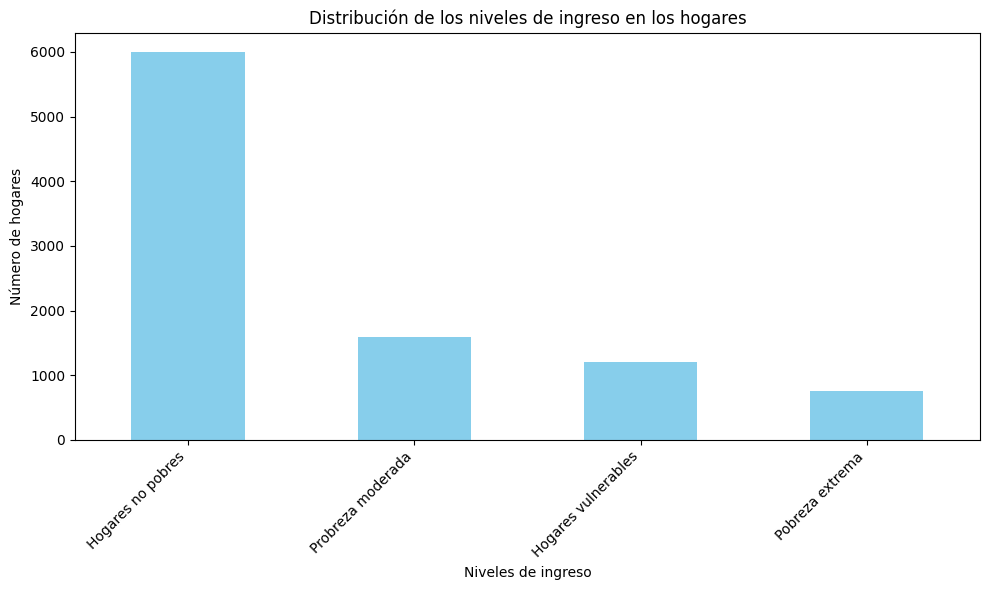

In [2]:
income_mapping = {
    1: 'Pobreza extrema',
    2: 'Probreza moderada',
    3: 'Hogares vulnerables',
    4: 'Hogares no pobres',
}

# Mapear 
povertyCount = df['Target'].map(income_mapping)
income_counts = povertyCount.value_counts()

plt.figure(figsize=(10, 6))
income_counts.plot(kind='bar', color='skyblue')

# Etiquetas
plt.xlabel('Niveles de ingreso')
plt.ylabel('Número de hogares')
plt.title('Distribución de los niveles de ingreso en los hogares')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Inmediatamente, se buscará si hay relación entre nivel de pobreza con los años de escolaridad, para saber si hay relación entre ser muy pobre y tener muchos o pocos años de escolaridad.

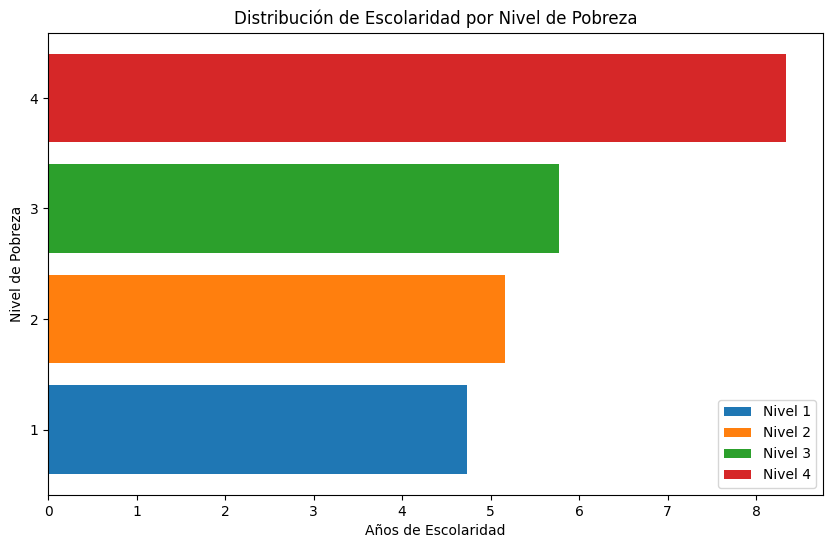

In [3]:
# Gráfico de barras
plt.figure(figsize=(10, 6))
for i in range(1, 5):
    plt.barh(i, df[df['Target'] == i]['escolari'].mean(), label=f'Nivel {i}')

plt.xlabel('Años de Escolaridad')
plt.ylabel('Nivel de Pobreza')
plt.title('Distribución de Escolaridad por Nivel de Pobreza')
plt.yticks(range(1, 5))
plt.legend()
plt.show()

Otro tipo de dato importante, ya que es de lo más fundamentales, es saber el número de viviendas precarias por zona, esto para distinguir entre los más necesitados, y donde se encuentran en su gran mayoría. Como se puede notar, la gran mayoría se encuentra en zonas urbanas.

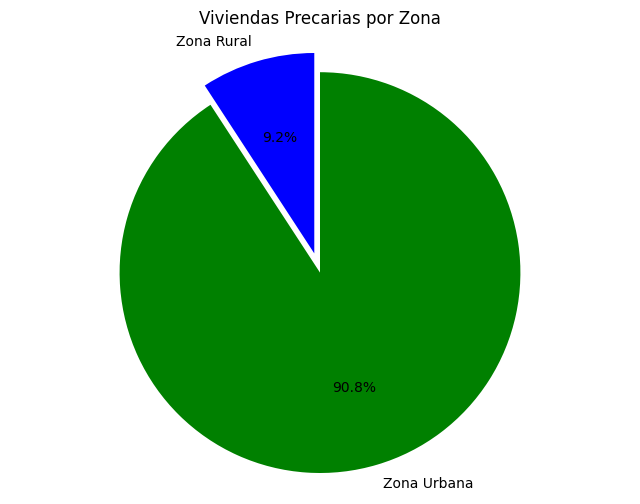

Número de viviendas precarias en zona rural: 15
Número de viviendas precarias en zona urbana: 148


In [4]:
precarias_rural = df[(df['tipovivi4'] == 1) & (df['area2'] == 1)].shape[0]
precarias_urbana = df[(df['tipovivi4'] == 1) & (df['area1'] == 1)].shape[0]

sizes = [precarias_rural, precarias_urbana]
labels = ['Zona Rural', 'Zona Urbana']
colors = ['blue', 'green']
explode = (0, 0.1)  # Resaltar la zona urbana

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que se dibuje un círculo.
plt.title('Viviendas Precarias por Zona')
plt.show()

print("Número de viviendas precarias en zona rural:", precarias_rural)
print("Número de viviendas precarias en zona urbana:", precarias_urbana)


Talvez una estadística que no parece tan importante en primer lugar es saber si las viviendas cuentan con los servicios básicos, esto puede indicar las más necesitadas, y cuál servicio básico es el más solicitado, para poder abastecer y ayudar a las viviendas necesitadas de agua o electricidad.

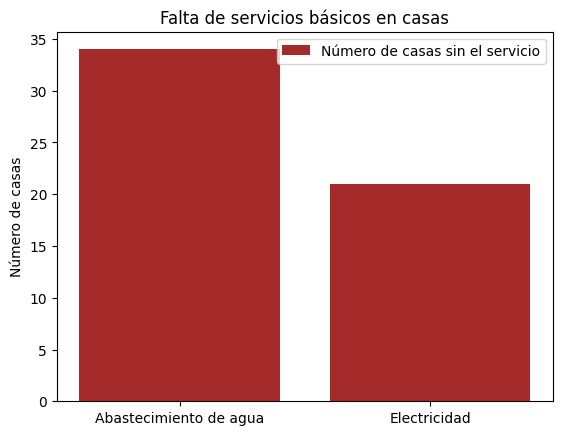

In [5]:
# Contar cuántas veces aparece el valor 1 en cada columna
abastaguano_count = (df['abastaguano'] == 1).sum()
noelec_count = (df['noelec'] == 1).sum()

# Definir las categorías
categories = ['Abastecimiento de agua', 'Electricidad']

fig, ax = plt.subplots()
bar1 = ax.bar(categories, [abastaguano_count, noelec_count], color='brown')

ax.set_ylabel('Número de casas')
ax.set_title('Falta de servicios básicos en casas')
ax.legend(['Número de casas sin el servicio'])

plt.show()

- Calidad de datos (debe constar vía código la revisión de aspectos de calidad de datos para todas las variables a utilizar)

Empezaremos comprobando que datos no están completos, en qué filas los datos están perdidos

In [6]:
df.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

Primero se revisará la variable de "Target", esto es sumamente importante para saber si hay casas que no están evaluadas

In [7]:
df.loc[df[['Target']].isnull().any(axis=1)]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


Por lo que se ve, no hay variables vacías en Target, se procederá a revisar de una vez todas las variables anteriores, en vista de que parece que muchas estarán completas.

In [8]:
columns_to_check = [
    'escolari', 'pisonotiene', 'cielorazo', 'abastaguano', 'noelec', 
    'elimbasu5', 'epared1', 'etecho1', 'eviv1', 'hogar_total', 
    'instlevel1', 'tipovivi4', 'area1', 'area2', 'idhogar', 'parentesco1', 'hogar_nin'
]

df.loc[df[columns_to_check].isnull().any(axis=1)]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


No hay variables vacías, por lo tanto, la integridad de los datos se encuentra correcta y se puede proceder a trabajar con ella.

# 3. Fase de preparación de los datos:

El objetivo de esta fase es preparar los datos en vista al entrenamiento de los modelos de estimación.
Esta sección debe describir las etapas utilizadas en Python. Puede presentar visualizaciones y tablas
que demuestren el resultado de los procesamientos.

- Selección de los datos

    Se contara con 20 variables, las cuales se consideran las más importantes para el modelado, de estas 20 variables no se encontro ninguno con datos nulos o con necesidad de limpieza, por lo que solo se procedera a utilizarlas.

In [9]:
columns_to_check = [
    'escolari', 'pisonotiene', 'cielorazo', 'abastaguano', 'noelec', 
    'elimbasu5', 'epared1', 'etecho1', 'eviv1', 'hogar_total', 
    'instlevel1', 'tipovivi4', 'area1', 'area2', 'idhogar', 'parentesco1', 'hogar_nin'
]

df.loc[df[columns_to_check].isnull().any(axis=1)]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


- Limpieza de los datos

Los datos, al encontrarse completos, no se realizará ningún tipo de limpieza.

- Construcción de nuevos datos (atributos)

    - Se creará una nueva columna llamada "casa_mal_estado", esta nueva columna indicará si alguna de las condiciones de mal estado se cumple en la casa. Combinar múltiples variables para generar un nuevo atributo, sintetiza información relevante.
    - Se crea una sola columna a partir de area1 y area2, donde si area_tipo es 1 es urbana y si es 0, es rural.

In [10]:
df['casa_mal_estado'] = (df['epared1'] | df['etecho1'] | df['eviv1'])
df.drop(['epared1', 'etecho1', 'eviv1'], axis=1, inplace=True)

# Como la columna 'area2' es el complemento de 'area1', podemos eliminarla, cuando area1 es 1, es que es urbana, por lo que ciuando los valores están en 0 es rural
df['area_tipo'] = df['area1']
df.drop(['area1', 'area2'], axis=1, inplace=True)


* Transformación de datos: Se omitirán los datos que no fueron elegidos para entrenar al model, por lo que se utilizará un data frame que no los tenga

In [11]:
columns_to_keep = [
    'Target',
    'escolari', 'pisonotiene', 'cielorazo', 'abastaguano', 'noelec', 
    'elimbasu5', 'casa_mal_estado', 'hogar_total', 
    'instlevel1', 'tipovivi4', 'area_tipo', 'parentesco1', 'hogar_nin'
]

# Selecciona sólo las columnas deseadas
df = df[columns_to_keep]

df.head()

,Target,escolari,pisonotiene,cielorazo,abastaguano,noelec,elimbasu5,casa_mal_estado,hogar_total,instlevel1,tipovivi4,area_tipo,parentesco1,hogar_nin
0,4,10,0,1,0,0,0,1,1,0,0,1,1,0
1,4,12,0,1,0,0,0,0,1,0,0,1,1,0
2,4,11,0,1,0,0,0,0,1,0,0,1,1,0
3,4,9,0,1,0,0,0,0,4,0,0,1,0,2
4,4,11,0,1,0,0,0,0,4,0,0,1,0,2


# 4. Fase de modelado: 

Esta fase describe las etapas del entrenamiento y evaluación. Se debe entrenar un
único modelo, puede ser de regresión o clasificación.
Debe constar los diferentes experimentos con sus respectivos parámetros con el fin de seleccionar el
mejor modelo. Para ello, no olvide separar los datos en training y testing para la evaluación de los
mismos, y aplicar CrossValidation como técnica para la selección del modelo.

In [13]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


### Decision tree model

In [14]:
X = df.iloc[:,1:]

Y = df.iloc[:,0]

#X_train y Y_train para entrenamiento
#X_test y Y_yest para prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=0)


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7167 entries, 2165 to 2732
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   escolari         7167 non-null   int64
 1   pisonotiene      7167 non-null   int64
 2   cielorazo        7167 non-null   int64
 3   abastaguano      7167 non-null   int64
 4   noelec           7167 non-null   int64
 5   elimbasu5        7167 non-null   int64
 6   casa_mal_estado  7167 non-null   int64
 7   hogar_total      7167 non-null   int64
 8   instlevel1       7167 non-null   int64
 9   tipovivi4        7167 non-null   int64
 10  area_tipo        7167 non-null   int64
 11  parentesco1      7167 non-null   int64
 12  hogar_nin        7167 non-null   int64
dtypes: int64(13)
memory usage: 783.9 KB


In [16]:
from sklearn.tree import DecisionTreeClassifier

#Árbol de decisión
treeD = DecisionTreeClassifier(max_depth=4)

#Entrenamiento del árbol
tree_poverty = treeD.fit(X_train, Y_train)

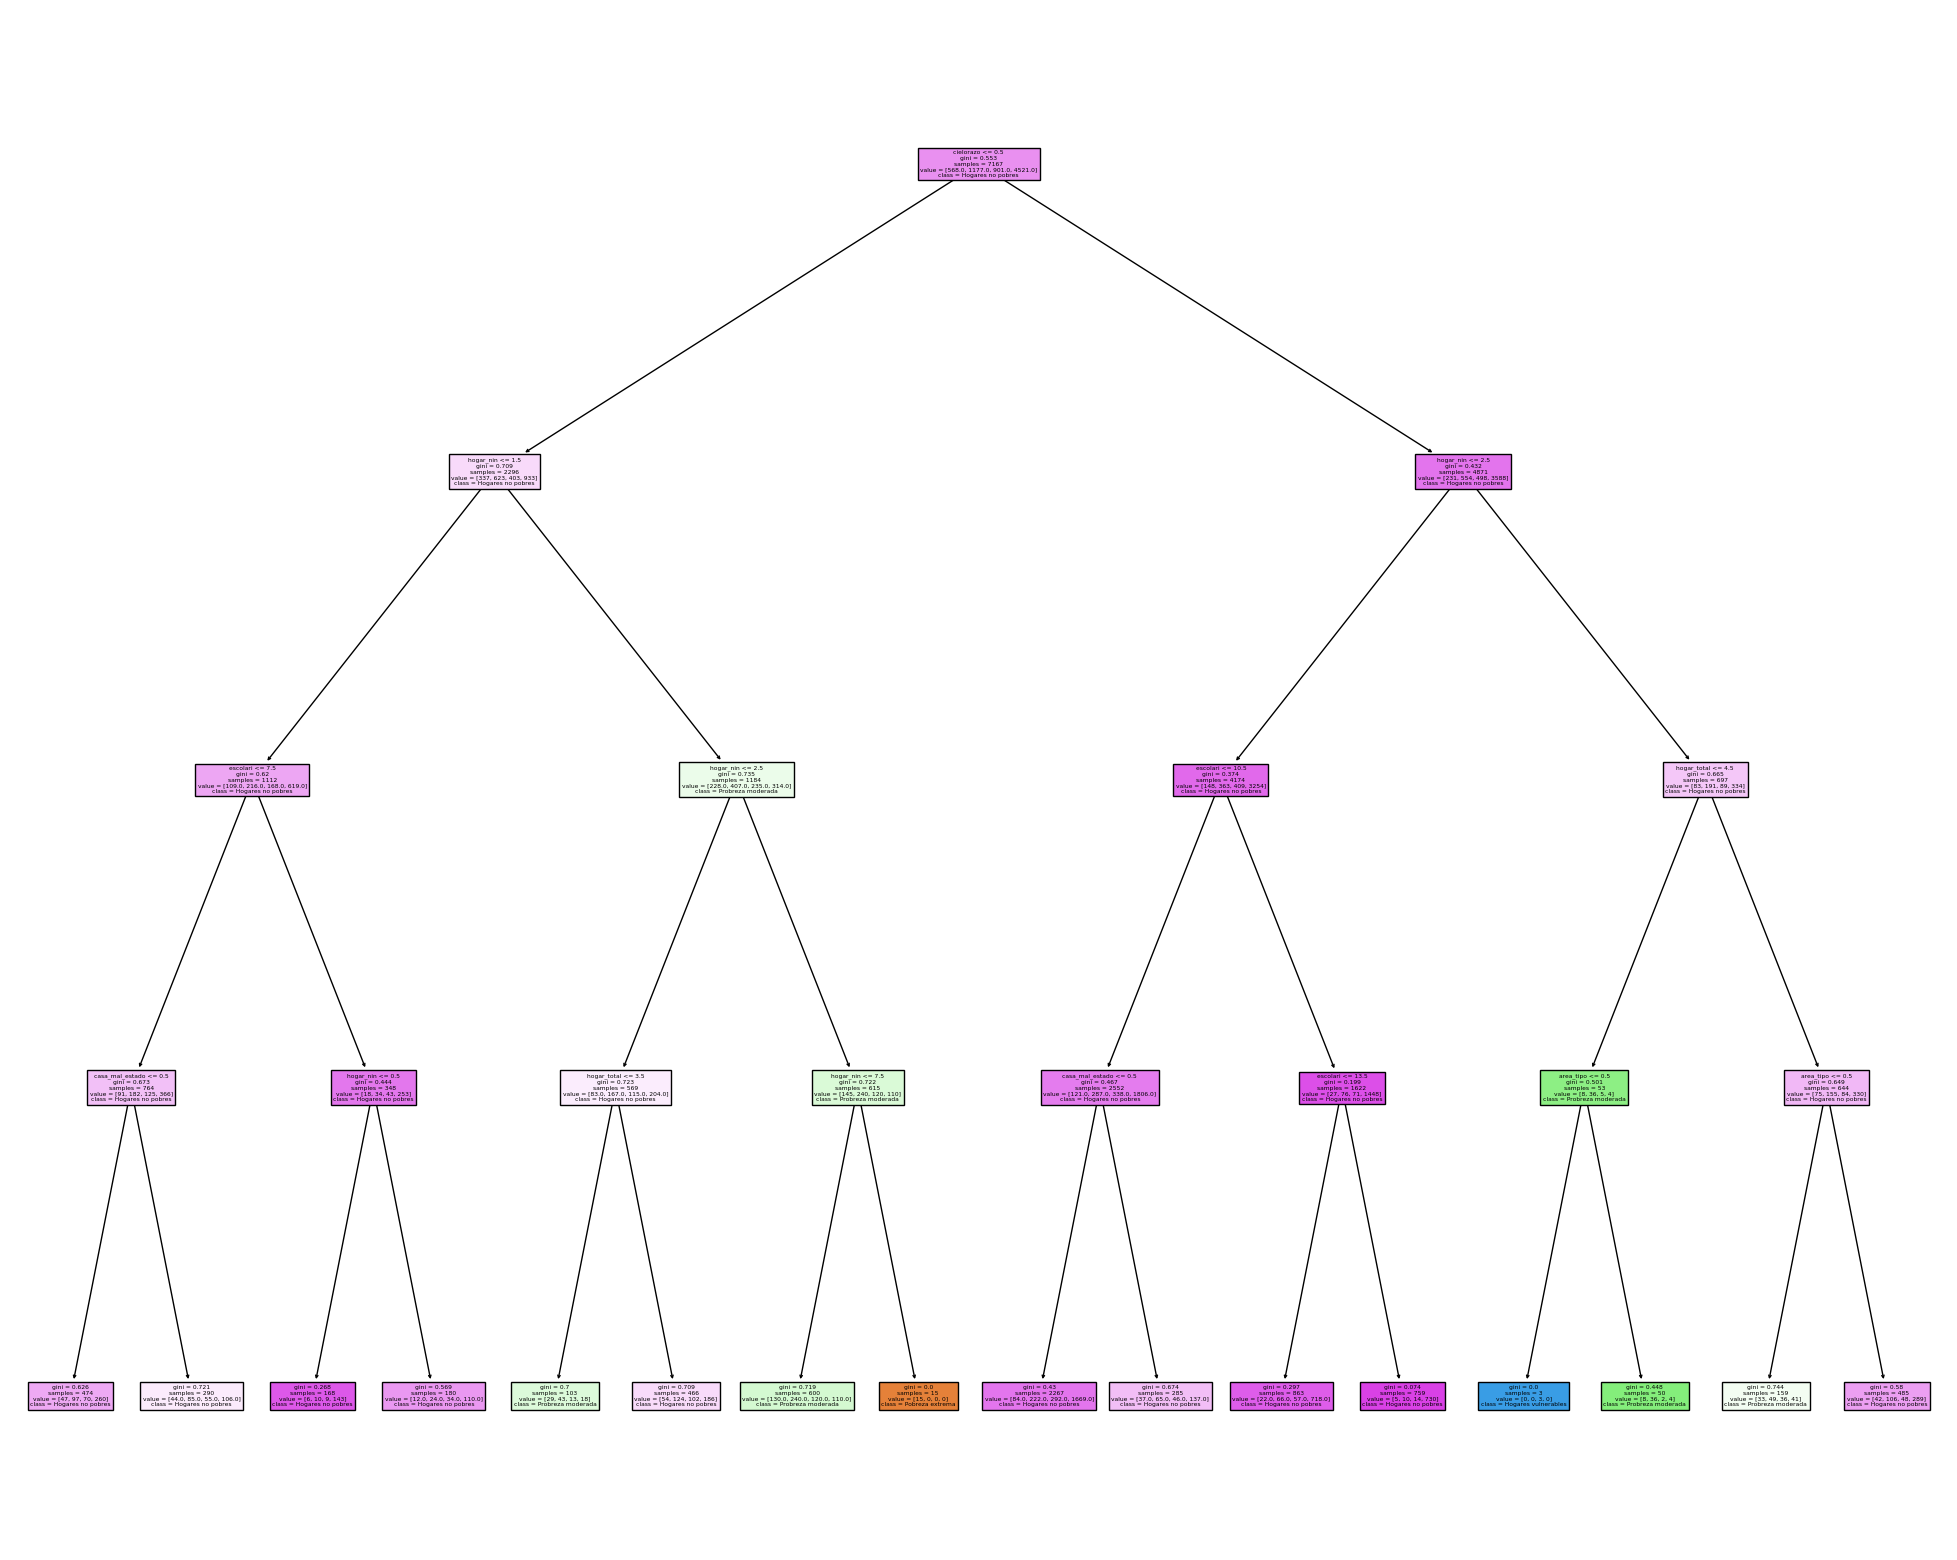

In [17]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))

income_mapping = {
    1: 'Pobreza extrema',
    2: 'Probreza moderada',
    3: 'Hogares vulnerables',
    4: 'Hogares no pobres',
}

# Suponemos que Y es tu variable objetivo con valores numéricos de 1 a 4
class_names = [income_mapping[x] for x in np.unique(Y) if x in income_mapping]

tree.plot_tree(tree_poverty, feature_names=list(X.columns.values),class_names=class_names, filled=True)

plt.show()

#### Calculando la precisión del modelo de decisión tree con cross value.

In [18]:
scores = cross_val_score(tree_poverty, X, Y, cv=5)

print("Scores de cada fold:", scores)
print("Promedio de los scores:", scores.mean())

Scores de cada fold: [0.65742678 0.63859833 0.66405024 0.62428048 0.64468864]
Promedio de los scores: 0.6458088932386601


### Modelo de regresión lineal con varias columnas

<Axes: xlabel='Target', ylabel='escolari'>

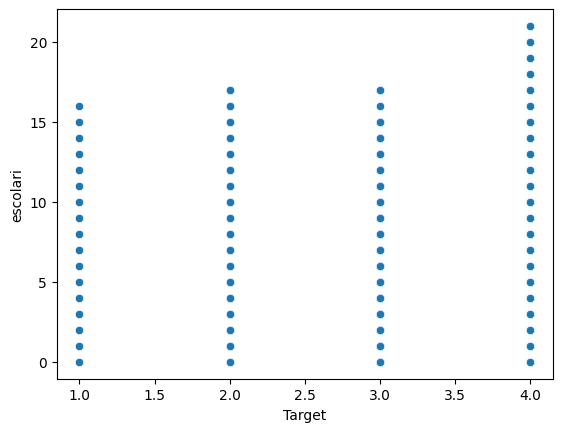

In [19]:
sns.scatterplot(x='Target', 
                y='escolari', data=df) 

In [20]:
X = df.iloc[:, 1:]  #Se escogen todas las otras columnas

Y = df.iloc[:, 0] #Se escoge target


X_train, X_test, Y_train, Y_test = train_test_split( 
    X, Y, test_size=0.75, random_state=0) 

# Crear modelo de regresión lineal
modelLinear = LinearRegression() 

# Crear el fit
modelLinear.fit(X_train,Y_train)


LinearRegression()

#### Score de regresión lineal con cross value

In [21]:
scores = cross_val_score(modelLinear, X, Y, cv=5)

print("Scores de cada fold:", scores)
print("Promedio de los scores:", scores.mean())


Scores de cada fold: [0.18376993 0.21804619 0.21013343 0.15373802 0.23925495]
Promedio de los scores: 0.20098850502169632


### Modelo de random forest

In [22]:
X = df.iloc[:,1:]

Y = df.iloc[:,0]

#X_train y Y_train para entrenamiento
#X_test y Y_yest para prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=0)

In [24]:
# crear el clasificador
clf = RandomForestClassifier(n_estimators = 100)  


clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)


### Score de random forest con cross validation

In [25]:
scores = cross_val_score(clf, X, Y, cv=5)
print("Scores de cada fold:", scores)
print("Promedio de los scores:", scores.mean())

Scores de cada fold: [0.63127615 0.61558577 0.63265306 0.58660387 0.52642595]
Promedio de los scores: 0.5985089626452448


### Gradient Boosting regression

In [26]:
X = df.iloc[:,1:]

Y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.75, random_state=0)

modelGradient = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
modelGradient.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

#### Score de regresión lineal con Gradient Boosting

In [27]:
scores = cross_val_score(modelGradient, X, Y, cv=5)

print("Scores de cada fold:", scores)
print("Promedio de los scores:", scores.mean())

Scores de cada fold: [0.65742678 0.64330544 0.65672423 0.63683935 0.60020931]
Promedio de los scores: 0.6389010222692231


# 5. Criterio de Selección y Conclusiones: 

En esta sección debe analizar porqué seleccionó el modelo y qué nueva información agrega a los datos (variables más importantes, etc)


### Análisis y Justificación del Modelo Seleccionado
El modelo de árbol de decisión fue seleccionado debido a su capacidad de manejar datos no lineales y ofrecer una interpretación intuitiva y visual de la toma de decisiones. Durante los experimentos, el árbol de decisión superó a otros modelos probados en términos de precisión y manejo de overfitting, especialmente útil en nuestro conjunto de datos con muchas variables categóricas y algunas continuas.

### Aporte de Nueva Información
El análisis con el modelo de árbol de decisión permitió identificar las variables críticas que influyen más significativamente en la determinación de las necesidades familiares. Entre estas, la variable 'hogar_nin' demostró ser un indicador crucial, sugiriendo que las familias con más niños son más propensas a requerir asistencia. Esto refleja una clara dirección para políticas enfocadas en hogares con niños.

### Conclusiones y Recomendaciones
El modelo ha mostrado ser efectivo en identificar las características más relevantes de las familias necesitadas, proporcionando así una herramienta valiosa para la toma de decisiones. Sin embargo, se recomienda explorar modelos adicionales que puedan capturar interacciones complejas entre variables o que ofrezcan mejor rendimiento con conjuntos de datos más grandes. Además, sería beneficioso incorporar más variables socioeconómicas para enriquecer el modelo y mejorar su capacidad predictiva.


Se eligió el modelo de árbol de decisión debido a que este fue el que dio un mejor score con la evaluación realizada por cross validation. Se procederá a analizar la nueva información que se pudo conseguir gracias al modelo.

In [28]:
feature_labels = list(X)
feature_importance = pd.DataFrame({'Feature' : feature_labels, 'Importance' : tree_poverty.feature_importances_})

feature_importance[feature_importance['Importance']>0.025]

,Feature,Importance
0,escolari,0.134752
2,cielorazo,0.405529
6,casa_mal_estado,0.054910
7,hogar_total,0.048981
10,area_tipo,0.039215
12,hogar_nin,0.316613


## Bibliografía
- [Scikit-Learn Gradient Boosting Regression Example](https://scikit-learn.org/0.18/auto_examples/ensemble/plot_gradient_boosting_regression.html)
- [Scikit-Learn Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)
- [Kaggle: Costa Rican Household Poverty Prediction](https://www.kaggle.com/competitions/costa-rican-household-poverty-prediction/overview)
- [Random Forest Classifier Using Scikit-Learn on GeeksforGeeks](https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/)
- [Multiple Linear Regression with Scikit-Learn on GeeksforGeeks](https://www.geeksforgeeks.org/multiple-linear-regression-with-scikit-learn/)
- [Scikit-Learn Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
